In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp 
%matplotlib inline

In [52]:
housing_train  = pd.read_csv('train.csv').drop("SalePrice",axis=1)

In [53]:
housin_train_label = pd.read_csv("train.csv")["SalePrice"]

In [54]:
 housing_test = pd.read_csv("test.csv")

In [38]:
columns = housing_train.columns

In [5]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### housing_train.describe()
att_to_drop = ["Id","Alley","FireplaceQu",""]

In [6]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#bsment finish 
housing_train["BsmtFinSF"]  =  housing_train["BsmtFinSF1"]+ housing_train["BsmtFinSF2"]
housing_train["BsmtFinSF_per_totalBsmt"] = housing_train['BsmtFinSF'] / housing_train["TotalBsmtSF"]
housing_train["BsmtUnSF_per_totalBsmt"] = housing_train["BsmtUnfSF"] / housing_train["TotalBsmtSF"]


In [8]:
housing_train["FlrSF"] = housing_train["1stFlrSF"]  + housing_train["2ndFlrSF"]
housing_train["TotalSF"] = housing_train["TotalBsmtSF"] + housing_train["1stFlrSF"]+ housing_train['2ndFlrSF']


In [9]:
#durration of no remodeling
housing_train["duration_of_no_remodeling"] =  housing_train["YearRemodAdd"]-housing_train["YearBuilt"]
#sold - built
housing_train["year_of_living_before_solding"] = housing_train["YrSold"] - housing_train["YearBuilt"]

In [10]:
housing_train[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1
...,...,...,...,...
1455,0,0,2,1
1456,1,0,2,0
1457,0,0,2,0
1458,1,0,1,0


In [11]:
housing_train["TotalFullBath"] =housing_train["FullBath"] + housing_train["BsmtFullBath"]
housing_train["TotalHalfBath"] = housing_train["HalfBath"]  + housing_train['BsmtHalfBath']
housing_train["TotalBaths"] = housing_train["TotalFullBath"]+ housing_train['TotalHalfBath']
housing_train['TotalBsmtBaths'] = housing_train["BsmtFullBath"]+ housing_train["BsmtHalfBath"]
housing_train["Total_dessu_Baths"] = housing_train['FullBath']+ housing_train["HalfBath"]

In [12]:
housing_train.corr()["SalePrice"].sort_values(ascending=False)

SalePrice                        1.000000
OverallQual                      0.790982
TotalSF                          0.782260
FlrSF                            0.716883
GrLivArea                        0.708624
GarageCars                       0.640409
GarageArea                       0.623431
TotalBsmtSF                      0.613581
TotalBaths                       0.613005
1stFlrSF                         0.605852
TotalFullBath                    0.582934
Total_dessu_Baths                0.568267
FullBath                         0.560664
TotRmsAbvGrd                     0.533723
YearBuilt                        0.522897
YearRemodAdd                     0.507101
GarageYrBlt                      0.486362
MasVnrArea                       0.477493
Fireplaces                       0.466929
BsmtFinSF1                       0.386420
BsmtFinSF                        0.366328
LotFrontage                      0.351799
WoodDeckSF                       0.324413
2ndFlrSF                         0

array([8450, 9600, 11250, ..., 9042, 9717, 9937], dtype=object)

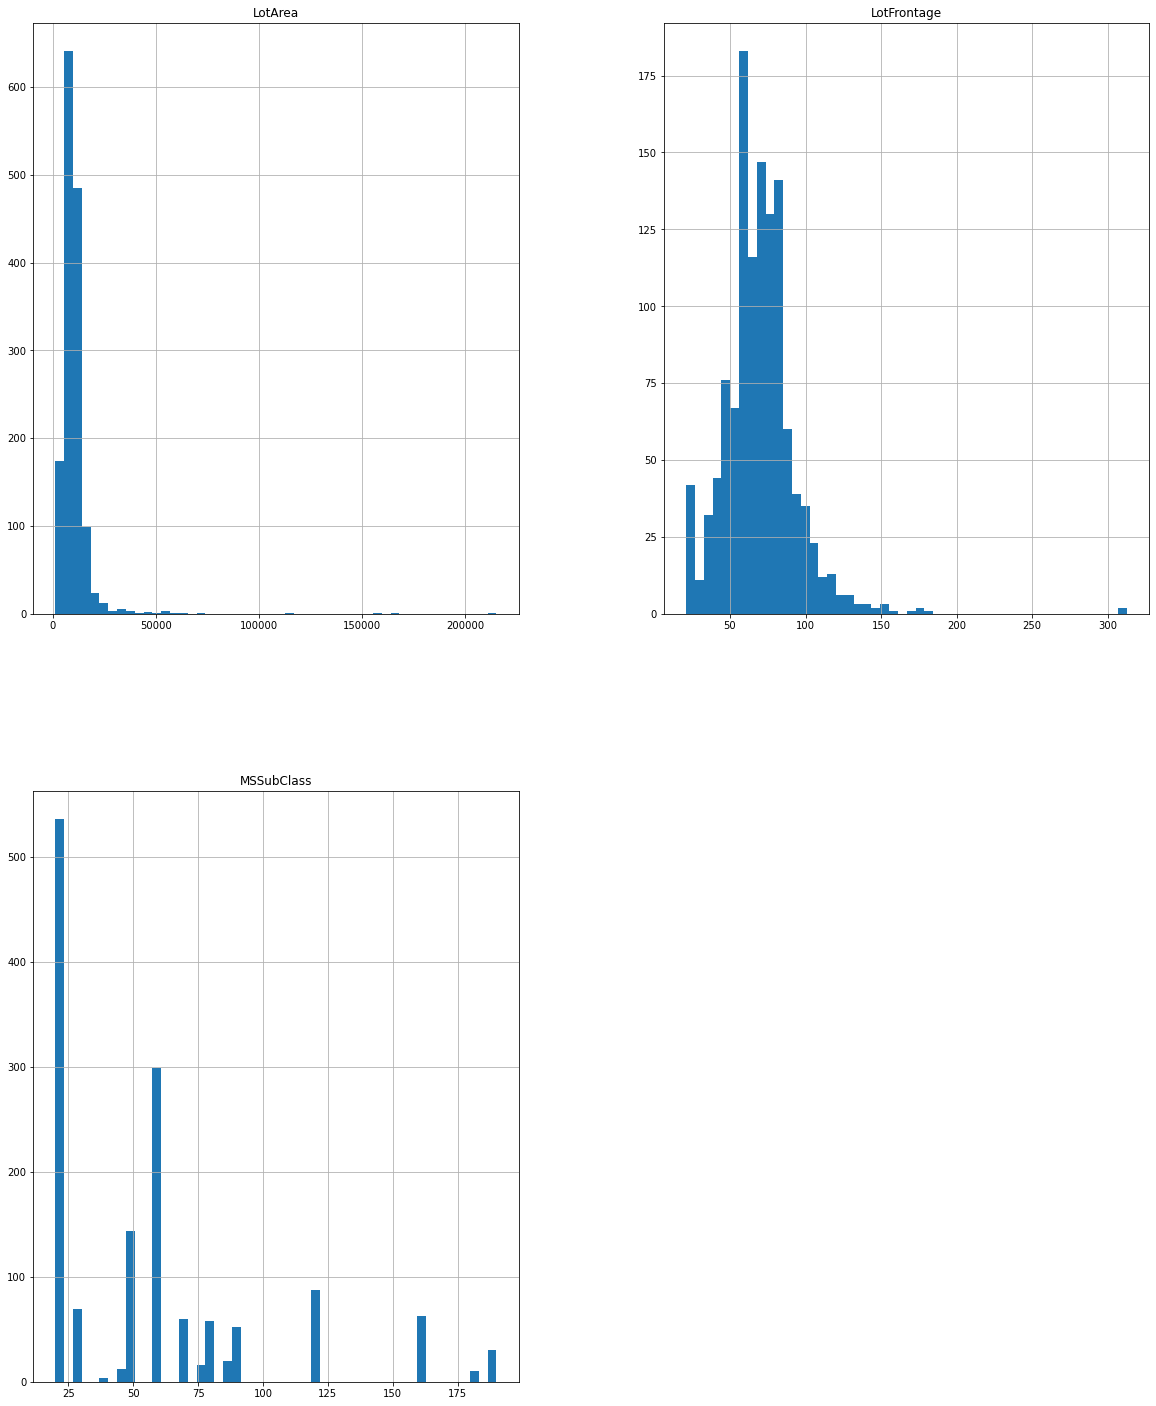

In [13]:
housing_train[housing_train.columns[1:10]].hist(bins=50, figsize=(20,25))
plt.show()

In [14]:
cat_att_to_drop = ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"]
num_att_to_drop = ["Id"]

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
class Num_Dropper(BaseEstimator, TransformerMixin):
    def __init__(self, to_drop):
        self.to_drop = to_drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X.drop(self.to_drop, axis=1,inplace=True)
        global columns
        columns.drop(self.to_drop)
        return X.select_dtypes(["int64","float64"])

In [16]:
class Cat_Dropper(BaseEstimator, TransformerMixin):
    def __init__(self, to_drop):
        self.to_drop = to_drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X.drop(self.to_drop, axis=1,inplace=True)
        global columns
        columns.drop(self.to_drop)
        return X.select_dtypes(["object"])

In [17]:
#eliminate null values for numerical attributes 
from sklearn.impute import SimpleImputer
housing_train_num = housing_train.select_dtypes(["int64","float64"])
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_train_num)
housing_train_num = pd.DataFrame(imputer.transform(housing_train_num),columns= housing_train_num.columns)

In [18]:
##### eliminate null values for categorical attributes 
from sklearn.base import BaseEstimator , TransformerMixin
class Eliminate_null_values(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,categ_att):
        return self
    def transform(self,categ_att):
        columns = categ_att.columns 
        for column in columns:
            categ_att[column] = categ_att[column].fillna(categ_att[column].mode()[0])
        return categ_att
    
#el_null_categ = eliminate_null_values()
#el_null_categ.fit(housing_train_cat)
#housing_train_cat = el_null_categ.transform(housing_train_cat)

In [19]:
class CombinedAtts(BaseEstimator,TransformerMixin):
    def __init__(self,add_bsmnt=False,duration_no_remodeling=False):
        self.add_bsmnt = add_bsmnt
        self.duration_no_remodeling = duration_no_remodeling
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None): 
        X["FlrSF"] = X["1stFlrSF"]  + X["2ndFlrSF"]
        X["TotalSF"] = X["TotalBsmtSF"] + X["1stFlrSF"]+ X['2ndFlrSF']
        
        X["TotalFullBath"] =X["FullBath"] + X["BsmtFullBath"]
        X["TotalHalfBath"] = X["HalfBath"]  + X['BsmtHalfBath']
        X["TotalBaths"] = X["TotalFullBath"]+ X['TotalHalfBath']
        X['TotalBsmtBaths'] = X["BsmtFullBath"]+ X["BsmtHalfBath"]
        X["Total_dessu_Baths"] = X['FullBath']+ X["HalfBath"]
        
        X["year_of_living_before_solding"] = X["YrSold"] - X["YearBuilt"]
        
        if (self.add_bsmnt): 
            X["BsmtFinSF"]  =  X["BsmtFinSF1"]+ X["BsmtFinSF2"]
            X["BsmtFinSF_per_totalBsmt"] = X['BsmtFinSF'] / X["TotalBsmtSF"]
            X["BsmtUnSF_per_totalBsmt"] = X["BsmtUnfSF"] / X["TotalBsmtSF"]
        if (self.duration_no_remodeling): 
            X["duration_of_no_remodeling"] =  X["YearRemodAdd"]-X["YearBuilt"]
            
        return X
# combined_atts= CombinedAtts(duration_no_remodeling=True)
# test = combined_atts.fit_transform(housing_train)
# test.corr()["SalePrice"].sort_values(ascending=False)

In [20]:
#feature scaling our numrical values  
from sklearn.preprocessing import StandardScaler , MinMaxScaler
std_scaler = StandardScaler()
std_scaler.fit(housing_train_num)
housing_train_num = pd.DataFrame(std_scaler.transform(housing_train_num),columns=housing_train_num.columns)

In [51]:
#dealing with categorized attributes
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
one_hot.fit(housing_train_cat)
housing_train_cat_copy = one_hot.transform(housing_train_cat)

NameError: name 'housing_train_cat' is not defined

In [22]:
# using pipeline transformation 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
#numerical pipeline
num_cols = housing_train.select_dtypes(['int64',"float64"]).columns
cat_cols = housing_train.select_dtypes(['object']).columns
num_pipeline= Pipeline([
    ("dropper", Num_Dropper(num_att_to_drop)),
    ('atts_adder',CombinedAtts(duration_no_remodeling=True)),
    ('imputer',SimpleImputer(strategy='median')),
    ("std_scaler",StandardScaler())
])


In [46]:
# #categorical pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# cat_pipeline= Pipeline([
#     ("cat_dropper",Cat_Dropper(cat_att_to_drop)),
#     ("eliminate_null",Eliminate_null_values()),
#     ('one_hot',OneHotEncoder()),
# ])


#categorical pipeline
#OrdinalEcoder
cat_pipeline= Pipeline([
    ("cat_dropper",Cat_Dropper(cat_att_to_drop)),
    ("eliminate_null",Eliminate_null_values()),
    ('one_hot',OrdinalEncoder()),
])



In [55]:
from sklearn.compose import ColumnTransformer
num_cols =  housing_train.select_dtypes(["int64","float64"]).columns
cat_cols= housing_train.select_dtypes(["object"]).columns
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ("cat",cat_pipeline,cat_cols)
])
#OrdinalEncoder
prepared_housing_train = pd.DataFrame(full_pipeline.fit_transform(housing_train))
#OneHotEncoder
# prepared_housing_train = pd.DataFrame(full_pipeline.fit_transform(housing_train))

In [56]:
prepared_housing_train 

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,4.0,2.0,6.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1456,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,4.0,3.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
1457,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1458,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,...,0.0,2.0,6.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0


In [57]:
housing_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [58]:
prepared_housing_test = pd.DataFrame(full_pipeline.fit_transform(housing_test))

In [59]:
prepared_housing_test

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,...,3.0,3.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,...,3.0,2.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,...,3.0,3.0,6.0,1.0,0.0,3.0,4.0,2.0,8.0,4.0
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,...,3.0,2.0,6.0,1.0,0.0,3.0,4.0,2.0,8.0,4.0
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,...,3.0,2.0,6.0,1.0,1.0,3.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-2.302019,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,-0.297689,...,3.0,3.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
1455,2.401505,-2.302019,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,-0.297689,...,3.0,3.0,6.0,4.0,2.0,3.0,4.0,2.0,8.0,0.0
1456,-0.874711,4.457971,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,-0.297689,...,3.0,3.0,6.0,5.0,2.0,3.0,4.0,2.0,8.0,0.0
1457,0.646389,-0.308065,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224509,-0.297689,...,3.0,3.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0


In [416]:
#this columns for the values which does not exist
for i in range(262,279):
    arr = []
    for j in range(len(prepared_housing_test)):
        arr.append(0)
    prepared_housing_test[i]= pd.Series(arr)

In [417]:
prepared_housing_test

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,...,0,0,0,0,0,0,0,0,0,0
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,...,0,0,0,0,0,0,0,0,0,0
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,...,0,0,0,0,0,0,0,0,0,0
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,...,0,0,0,0,0,0,0,0,0,0
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-2.302019,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,-0.297689,...,0,0,0,0,0,0,0,0,0,0
1455,2.401505,-2.302019,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,-0.297689,...,0,0,0,0,0,0,0,0,0,0
1456,-0.874711,4.457971,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,-0.297689,...,0,0,0,0,0,0,0,0,0,0
1457,0.646389,-0.308065,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224509,-0.297689,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#selecting a model 
    from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_housing_train,housin_train_label)

# testing with some data 
some_data = housing_train[:5]
some_lables = housin_train_label[:5]
some_prepared_data = full_pipeline.fit_transform(some_data)

print('predictions = ',lin_reg.predict(some_prepared_data))
print("Lablels= " ,  list(some_lables))


predictions =  [-7.31857241e+16  1.17006232e+17 -3.77694720e+16  5.24856321e+16
 -5.85366676e+16]
Lablels=  [208500, 181500, 223500, 140000, 250000]


In [65]:
#testing with all the trainig data  and evaluating 
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(prepared_housing_train)
mse = mean_squared_error(housin_train_label, predictions) 
rmse = np.sqrt(mse)
rmse



31446.71796989059

In [68]:
#fonction for displaying the resaults
def display_scores(scores) : 
    print("Scores : ",scores)
    print('Mean : ',scores.mean())
    print("Std : " ,scores.std() )

In [72]:
#testing with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
# scores = cross_val_score(lr_model, prepared_housing_train, housin_train_label,scoring="neg_mean_squared_error",cv=100)
scores = cross_val_score(dt_reg, prepared_housing_train, housin_train_label,scoring="neg_mean_squared_error",cv=10)
linear_reagresion_scores = np.sqrt(-scores)

display_scores(linear_reagresion_scores)

Scores :  [38570.52633218 38962.92019396 36929.70447229 41537.01140236
 39475.92435825 35324.48164313 50373.03408387 31562.2791982
 33663.59138798 41860.79353954]
Mean :  38826.02666117728
Std :  4956.497114698723


In [82]:
#we are going to use the GradientBoosting 
gb_reg = GradientBoostingRegressor(learning_rate=0.1,loss="lad",max_depth=10,n_estimators=650,
                                  )
gb_reg.fit(prepared_housing_train,housin_train_label)
preds = gb_reg.predict(prepared_housing_test)
create_and_save_submitions(preds,"gradientBoosting")
print(preds)

[133851.74352676 161528.36007433 189443.71420079 ... 189980.26588515
 122913.61695562 222528.21616581]


In [85]:
create_and_save_submitions(preds,"gradientBoosting")


In [ ]:
create_and_save_submitions(preds,"gradientBoosting")

In [84]:
def create_and_save_submitions(predictions,file_name):
    housing_test["SalePrice"] = pd.Series(predictions)
    submission = housing_test[['Id',"SalePrice"]]
    submission.to_csv(f'{file_name}.csv',index=False)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
lin_reg = LinearRegression()
svr = SVR()
dt_reg = DecisionTreeRegressor()
gb_reg = GradientBoostingRegressor()
rf_reg = RandomForestRegressor()



In [75]:
models=  {
    "Linear Regression" : lin_reg, 
    "SVR": svr,
    "Decision Tree" : dt_reg, 
    "Gradient Boosting" : gb_reg, 
    "Random Forest": rf_reg, 
}

In [76]:
#results with OrdinalEncoder
for model in models.items(): 
    model[1].fit(prepared_housing_train,housin_train_label)
    scores = cross_val_score(model[1],prepared_housing_train,housin_train_label,scoring='neg_mean_squared_error',cv=10)
    model_scores = np.sqrt(-scores)
    print("***********",model[0],"*****************")
    print("\n")
    display_scores(model_scores)
    
    
    
# #results with OneHotEncoder
# for model in models.items(): 
#     model[1].fit(prepared_housing_train,housin_train_label)
#     scores = cross_val_score(model[1],prepared_housing_train,housin_train_label,scoring='neg_mean_squared_error',cv=10)
#     model_scores = np.sqrt(-scores)
#     print("***********",model[0],"*****************")
#     print("\n")
#     display_scores(model_scores)

*********** Linear Regression *****************


Scores :  [2.25174330e+04 2.77170575e+04 2.56972720e+04 4.21043176e+04
 3.63190392e+04 2.93628697e+04 5.72885938e+10 2.87254544e+04
 6.28942414e+04 2.54350910e+04]
Mean :  5728889455.114814
Std :  17186568107.756157
*********** SVR *****************


Scores :  [69004.57971711 84088.99857882 81692.65266407 85188.94957853
 98715.5058879  79314.84224464 72438.58830939 71171.05730172
 93818.38132192 73294.24171729]
Mean :  80872.77973213876
Std :  9389.20463593517
*********** Decision Tree *****************


Scores :  [38925.53698172 36862.12121356 41258.40666342 42631.93018688
 40509.67413141 33378.88231711 35441.85598736 31474.7765813
 38066.85632596 45818.68195413]
Mean :  38436.87223428384
Std :  4125.856228628573
*********** Gradient Boosting *****************


Scores :  [20547.87625633 24649.83105919 22781.40276005 39712.14856753
 29652.49217248 23944.33286179 21813.0642152  21351.81193033
 25375.99699227 24174.28414376]
Mean :  25

on remarque que les meilleures resultats sont pour : 
    gradient boosting 
    random forest 
    decision trees
donc on va faire un grid search pour chaque algo et esseyer de voir les meilleures results apres le grid search 

In [77]:
gb_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
gb_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [444]:
from sklearn.model_selection import GridSearchCV

grid_params_RF = [
    {"n_estimators" : [10,100,650],
     "max_features" : [10,150,300], 
     "max_samples" :  [10,100], 
     "bootstrap" : [True,False],
     "n_jobs" : [-1,15]
    }, 
    {"n_estimators" : [30,250,500],
     "max_features" : ["auto","sqrt"], 
     "max_samples" :  [10,100],
     "max_samples_leaf" : [1,15,3],
     "n_jobs" : [-1]
    }
]

grid_params_GB = [
    {
    "loss" : ['ls', 'lad'],
     "learning_rate" : [0.01,0.1,0.5], 
     "min_samples_split" :  [10,100], 
     "max_depth" : [3,7,20],
     "max_leaf_nodes" : [2,15,10]
    },
    {
    "loss" : ['huber', 'quantile'],
     "learning_rate" : [0.6,0.4,0.8], 
     "subsample " :  [10,100,200], 
     "max_depth" : [2,4,14],
     "warm_start" : [True,False],
     "ccp_alpha" : [0.5,0.2]
    }
]
grid_params_DT = [
    {
    "criterion" : ["mse", "friedman_mse"], 
     "max_depth" :  [10,100,250], 
     "max_features" : [30,70,40],
        "random_state": [30,150,300]
    },
    {
     "criterion" : ["mse", "mae"],
     "splitter" : ["random"], 
     "subsample " :  [10,100,200], 
     "max_depth" : [2,4,14],
     "ccp_alpha" : [0.5,0.2]
    }
]

In [450]:
rf_reg = RandomForestRegressor()
grid_params_RF = [
    {"n_estimators" : [10,100,650],
     "max_features" : [10,45,80], 
     "bootstrap" : [True,False],
    }, 
    {"n_estimators" : [52,250,500], 
     "max_samples" :  [10,100,1000],
     "n_jobs" : [-1]
    }
]

grid_searchRF = GridSearchCV(rf_reg,grid_params_RF,scoring="neg_mean_squared_error",return_train_score=True)
grid_searchRF.fit(prepared_housing_train,housin_train_label)


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [455]:
print("Best params : ",grid_searchRF.best_params_)
print("Best estimator : ",grid_searchRF.best_estimator_)

Best params :  {'bootstrap': False, 'max_features': 45, 'n_estimators': 650}
Best estimator :  RandomForestRegressor(bootstrap=False, max_features=45, n_estimators=650)


In [ ]:
GradientBoostingRegressor()

In [456]:
gb_reg= GradientBoostingRegressor()
grid_params_GB = [
    {
    "loss" : ['ls', 'lad'],
     "learning_rate" : [0.1,0.5], 
     "max_depth" : [1,10],
    },
    {
    "loss" : ['huber', 'quantile'],
    "alpha" : [0.9,0.5],
     "warm_start" : [True,False],
        
    }
]

grid_search_GB = GridSearchCV(gb_reg,grid_params_GB,scoring="neg_mean_squared_error",return_train_score=True)
grid_search_GB.fit(prepared_housing_train,housin_train_label)
print("Best params",grid_search_GB.best_params_)
print("Best estimator",grid_search_GB.best_estimator_)

Best params {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 10}
Best estimator GradientBoostingRegressor(loss='lad', max_depth=10)


In [459]:
grid_params_DT = [
    {
     "criterion" : ["mse", "friedman_mse"], 
     "max_depth" :  [10,100], 
     "random_state": [30,300]
    },
    {
     "splitter" : ["random"], 
     "subsample " :  [10,100], 
#      "ccp_alpha" : [0.5,0.2]
    }
]

grid_search_DT = GridSearchCV(gb_reg,grid_params_DT,scoring="neg_mean_squared_error",return_train_score=True)
grid_search_DT.fit(prepared_housing_train,housin_train_label)
print("Best params",grid_search_DT.best_params)
print("Best estimator",grid_search_DT.best_estimator)

ValueError: Invalid parameter splitter for estimator GradientBoostingRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [439]:
dt_reg = DecisionTreeRegressor()
gb_reg = GradientBoostingRegressor()


grid_search_RF = GridSearchCV(rf_reg,grid_params_RF,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search_RF.fit(prepared_housing_train,housin_train_label)
print("Best parameters of Random Forest: ",grid_search_RF.best_params_)
print("best estimators : of Random Forest" , grid_search_RF.best_estimator_)



grid_search_GB = GridSearchCV(gb_reg,grid_params_GB,scoring="neg_mean_squared_error",return_train_score=True)
grid_search_GB.fit(prepared_housing_train,housin_train_label)

print("Best params for Gradient boosting are : ", grid_search_GB.best_params_)
print("Best estimators of Gradient boosting are : " , grid_search_GB.best_estimator_)


grid_search_DT = GridSearchCV(dt_reg,grid_params_DT,scoring="neg_mean_squared_error",return_train_score=True)
grid_search_DT.fit(prepared_housing_train,housin_train_label)

print("Best params for Gradient boosting are : ", grid_search_DT.best_params_)
print("Best estimators of Gradient boosting are : " , grid_search_DT.best_estimator_)



C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

C:\Users\21355\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\21355\Anaconda3\lib\site-packages\joblib\parallel.py", line 252, in <listcomp>
    return [f

ValueError: Invalid parameter max_samples_leaf for estimator RandomForestRegressor(max_samples=10). Check the list of available parameters with `estimator.get_params().keys()`.

In [432]:
grid_params_RF = [
    {"n_estimators" : [10,100,650],
     "max_features" : [10,150,300], 
     "bootstrap" : [True,False],
    }, 
    {"n_estimators" : [30,250,500], 
     "max_samples" :  [10,100],
     "n_jobs" : [-1]
    }
]

grid_params_GB = [
    {
    "loss" : ['ls', 'lad'],
     "learning_rate" : [0.01,0.1,0.5], 
     "min_samples_split" :  [10,100], 
     "max_depth" : [3,7,20],
     "max_leaf_nodes" : [2,15,10]
    },
    {
    "loss" : ['huber', 'quantile'],
     "learning_rate" : [0.6,0.4,0.8], 
     "subsample " :  [10,100,200], 
     "max_depth" : [2,4,14],
     "warm_start" : [True,False],
     "ccp_alpha" : [0.5,0.2]
    }
]
grid_params_DT = [
    {
    "criterion" : ["mse", "friedman_mse"], 
     "max_depth" :  [10,100,250], 
     "max_features" : [30,70,40],
        "random_state": [30,150,300]
    },
    {
     "criterion" : ["mse", "mae"],
     "splitter" : ["random"], 
     "subsample " :  [10,100,200], 
     "max_depth" : [2,4,14],
     "ccp_alpha" : [0.5,0.2]
    }
]

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}